In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import matplotlib.patches as patches
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib as mpl

# Make a user-defined colormap.
cm1 = mcol.LinearSegmentedColormap.from_list("MyCmapName",["b","r"])

## Canadian Climate Stripes
This code will open homogenized temperature data provided by Environment and Climate Change Canada, and produce plots of annual and seasonal climate stripes. 

Minimum anomaly: -2.988888888888889
Maximum anomaly: 2.211111111111111
Standard deviation: 1.073076280991262


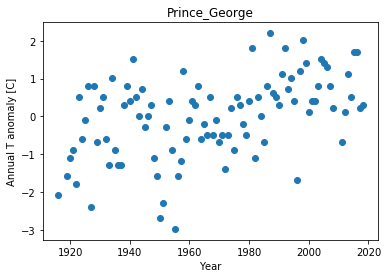

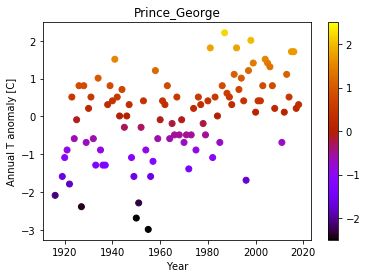

In [18]:
# Grab the homogenized data set from Environment and Climate Change Canada: 
# https://www.canada.ca/en/environment-climate-change/services/climate-change/science-research-data/climate-trends-variability/adjusted-homogenized-canadian-data/surface-air-temperature-access.html
# Extract the full dataset locally

# find the ID of the station youstation IDs and load text files into a pandas data frame
site = 'Prince_George'
dat = pd.read_table('data/Homog_monthly_mean_temp/mm1096439.txt',sep=',',skiprows=3,
                      na_values=-9999.9, index_col=False,lineterminator='\n')
# calculate anomalies and do test plots
z = dat['  Annuel']
yr = dat['Annee']

meanz = np.nanmean(z)
zanoms = z - meanz
sd = np.std(z)

print ('Minimum anomaly: ' + str(np.nanmin(zanoms)))
print ('Maximum anomaly: ' + str(np.nanmax(zanoms)))
print ('Standard deviation: ' + str(sd))
# scatterplot
plt.figure()
ax1 = plt.scatter(yr, zanoms)
plt.xlabel('Year')
plt.ylabel('Annual T anomaly [C]')
plt.title(site)

# scatterplot of anomaly versus year, with points coded by anomaly
plt.figure()
ax1 = plt.scatter(yr, zanoms, c=zanoms,cmap=plt.cm.gnuplot, vmin=-2.5, vmax=2.5)
plt.xlabel('Year')
plt.ylabel('Annual T anomaly [C]')
plt.title(site)
plt.colorbar()


The traditional scatter plot isn't very informative. There is a lot of variability in the annual temperature anomalies 

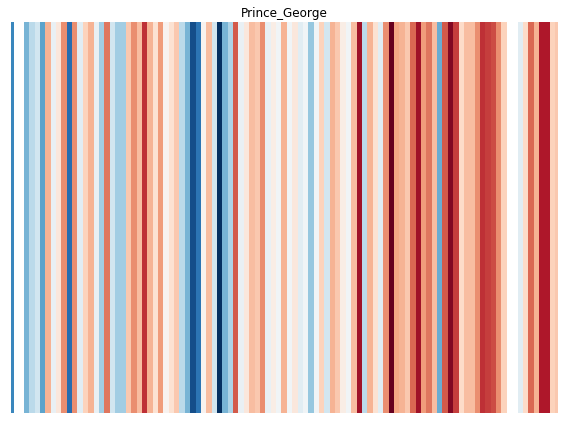

In [14]:
# plot annual climate stripes
fig1 = plt.figure(figsize=(8,6),frameon=False)
# normalized anomalies
norm = mpl.colors.Normalize(vmin=np.nanmin(zanoms),vmax=np.nanmax(zanoms))
ax = plt.subplot(111)    

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
#loop through data and plot vertical line for each year
# linewidth may need to be customized depending on length of dataset...
for i in range(0,len(z)):
    if np.isnan(z[i]) == 0:
        plt.axvline(i,color = plt.cm.RdBu_r(norm(zanoms[i])),linewidth=6)
        
cur_axes = fig1.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.margins(x=0)
plt.title(site)
plt.tight_layout()
plt.savefig('ClimateStripes-'+site+'.png',dpi=300,bbox='tight')

C:\Users\sheaj\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


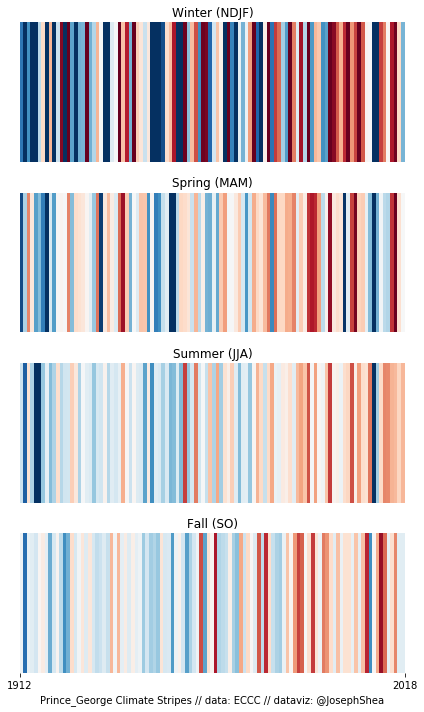

In [15]:

# Calculate seasonal stripes, using the "canadian" definition:
#winter = NDJF, spring = MAM, summer = JJA, fall = SA
# for winter need to use NOV/DEC data from previous year
NDJF = np.zeros(len(zanoms))
for i in range(1,len(yr)):
    NDJF[i] = ( (dat['     Nov'][i-1]) + (dat['     Dec'][i-1]) + (dat['    Janv'][i]) + dat['     Fev'][i])/4
NDJF[0] = np.nan
meanz_NDJF = np.nanmean(NDJF)
zanoms_NDJF = NDJF - meanz_NDJF

z = (dat['    Juin'] + dat['    Juil'] + dat['    Aout'])/3
meanz_JJA = np.nanmean(z)
zanoms_JJA = z - meanz_JJA

z = (dat['    Mars'] + dat['     Avr']+ dat['     Mai'])/3
meanz_MAM = np.nanmean(z)
zanoms_MAM = z - meanz_MAM

z = (dat['    Sept'] + dat['    Aout'])/2
meanz_SO = np.nanmean(z)
zanoms_SO = z - meanz_SO

# plot seasonal stripes
fig1 = plt.figure(figsize=(6,10))

#NDJF
ax = plt.subplot(411)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
norm = mpl.colors.Normalize(vmin=-3,vmax=3)
for i in range(0,len(z)):
    if np.isnan(z[i]) == 0:
        plt.axvline(i,color = plt.cm.RdBu_r(norm(zanoms_NDJF[i])),linewidth=8)
cur_axes = fig1.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.margins(x=0)
plt.title('Winter (NDJF)')

#MAM
ax = plt.subplot(412)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
norm = mpl.colors.Normalize(vmin=-3,vmax=3)
for i in range(0,len(z)):
    if np.isnan(z[i]) == 0:
        plt.axvline(i,color = plt.cm.RdBu_r(norm(zanoms_MAM[i])),linewidth=8)
cur_axes = fig1.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.margins(x=0)
plt.title('Spring (MAM)')

#JJA
ax = plt.subplot(413)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
norm = mpl.colors.Normalize(vmin=-3,vmax=3)
for i in range(0,len(z)):
    if np.isnan(z[i]) == 0:
        plt.axvline(i,color = plt.cm.RdBu_r(norm(zanoms_JJA[i])),linewidth=8)
cur_axes = fig1.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.margins(x=0)
plt.title('Summer (JJA)')

#SO
ax = plt.subplot(414)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
norm = mpl.colors.Normalize(vmin=-3,vmax=3)
for i in range(0,len(z)):
    if np.isnan(z[i]) == 0:
        plt.axvline(i,color = plt.cm.RdBu_r(norm(zanoms_SO[i])),linewidth=8)
cur_axes = fig1.gca()
#cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.margins(x=0)
plt.xticks([0,len(yr)],[min(yr),max(yr)])
plt.xlabel(site+' Climate Stripes // data: ECCC // dataviz: @JosephShea')
plt.title('Fall (SO)')
plt.tight_layout()
plt.savefig('ClimateStripes-'+site+'-seasonal.png')